### Ativdade 1
Thaís Laura
14608765

#### Questão 1
##### Parte 1

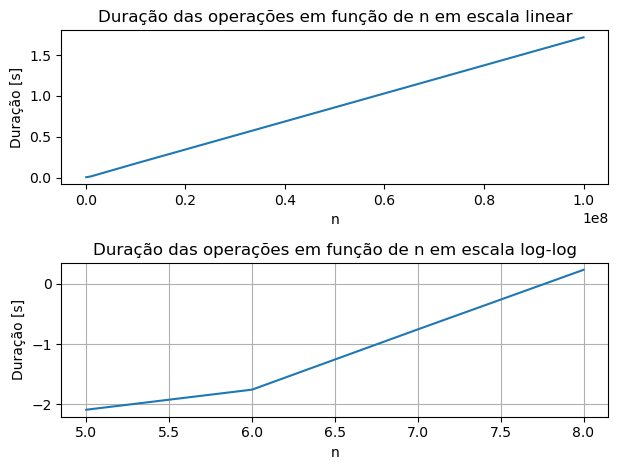

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def novo_vetor(a, b):
    ti = time.time()
    alpha = np.random.rand()
    beta = np.random.rand()
    c = alpha*a + beta*b
    duracao = time.time() - ti 
    return duracao
    
n = 10**5
n_lista1 = []
d_lista1 = []
while n < 10**9:
    a = np.random.rand(1,n)
    b = np.random.rand(1,n)
    duracao = novo_vetor(a, b)
    n_lista1.append(n)
    d_lista1.append(duracao)
    n = n*10

fig, ax = plt.subplots(2,1)
x1 = n_lista1
y1 = d_lista1
for i in range(len(y1)):
    if y1[i] == 0:
        y1[i] = 10**-10
xlog = np.log10(x1)
ylog = np.log10(y1)
ax[0].plot(x1, y1)
plt.grid()
ax[0].set_title('Duração das operações em função de n em escala linear')
ax[0].set_xlabel('n')
ax[0].set_ylabel('Duração [s]')
ax[1].plot(xlog, ylog)
ax[1].set_title('Duração das operações em função de n em escala log-log')
ax[1].set_xlabel('n')
ax[1].set_ylabel('Duração [s]')

fig.tight_layout()
plt.show()

##### Parte 2

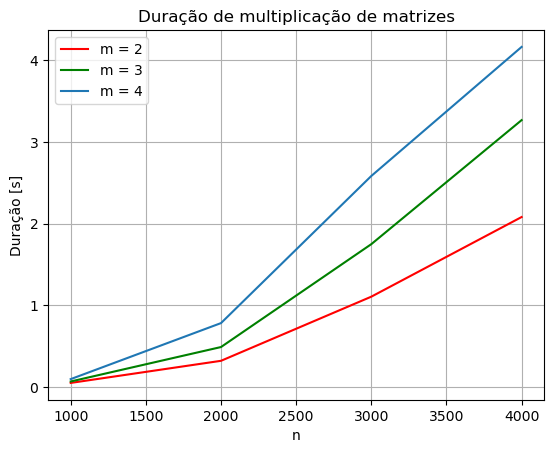

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def mult_matriz(A, m):
    ti = time.time()
    Afinal = A
    for i in range (m):
        Afinal = Afinal @ A
    duracao = time.time() - ti
    return duracao


x2 = []
y2 = [[] for _ in range(3)]
for m in range(2, 5):
    n_lista2 = []
    d_lista2 = []
    for n in range(1000, 5000, 1000):
        A = np.random.rand(n, n)
        duracao = mult_matriz(A, m)
        n_lista2.append(n)
        d_lista2.append(duracao)
        if n == 4000:
            y2[m - 2] = d_lista2[:]
    x2 = n_lista2[:]

plt.plot(x2, y2[0], '-r', x2, y2[1], '-g', x2, y2[2])
plt.grid()
plt.xlabel('n')
plt.ylabel('Duração [s]')
plt.title('Duração de multiplicação de matrizes')
plt.legend(['m = 2', 'm = 3', 'm = 4'])
plt.show()

#### Questão 2

In [2]:
import numpy as np
import time
ti = time.time()

def seq(a, N):
    x = np.zeros((N,), dtype=np.float64)
    for n in range(N):
        if n == 0:
            x[0] = 0.1
        else:
            x[n] = a*(x[n-1])*(1-x[n-1])
    return x

def media(x, N):
    soma = 0
    for i in range(N):
        soma = soma + x[i]
    xm = soma/N
    return xm

def varianca(x, xm, N):
    soma = 0
    for i in range(N):
        dif_quad = (x[i]-xm)**2
        soma = soma + dif_quad
    var = soma/(N-1)
    return var

N = 5000
x = np.zeros((4, N), dtype=np.float64)
med = np.zeros(4, dtype=np.float64)
var = np.zeros(4, dtype=np.float64)
a = np.array([1.0, 2.0, 3.8, 4.0])
for i in range(4):
    x[i] = seq(a[i], N)
    med[i] = media(x[i], N)
    var[i] = varianca(x[i], med[i], N)
    
duracao_manual = time.time() - ti
print(duracao_manual)

ti = time.time() 
media = np.zeros(4, dtype=np.float64)
varianca = np.zeros(4, dtype=np.float64)
for i in range(4):
    x[i,:] = seq(a[i], N)
    media[i] = np.mean(x[i])
    varianca[i] = np.var(x[i])
duracao_numpy = time.time() - ti
print(duracao_numpy)

# Vê-se que houve uma diminuição de quase 0,02 segundos ao utilizar funções de média e variança da biblioteca Numpy.
# Isso acontece devido a como a linguagem Python é processada: na verdade, ela é somente interpretada, ou seja,
# diferente de linguagens de baixo nível (como C), ela não é compilada antes de ser rodada, o que pode requerir mais tempo.
# Também, Numpy utiliza algoritimos otimizados, possibilitando que as funções gerem resultados de forma mais rápida.

0.04927635192871094
0.03183293342590332


#### Questão 3

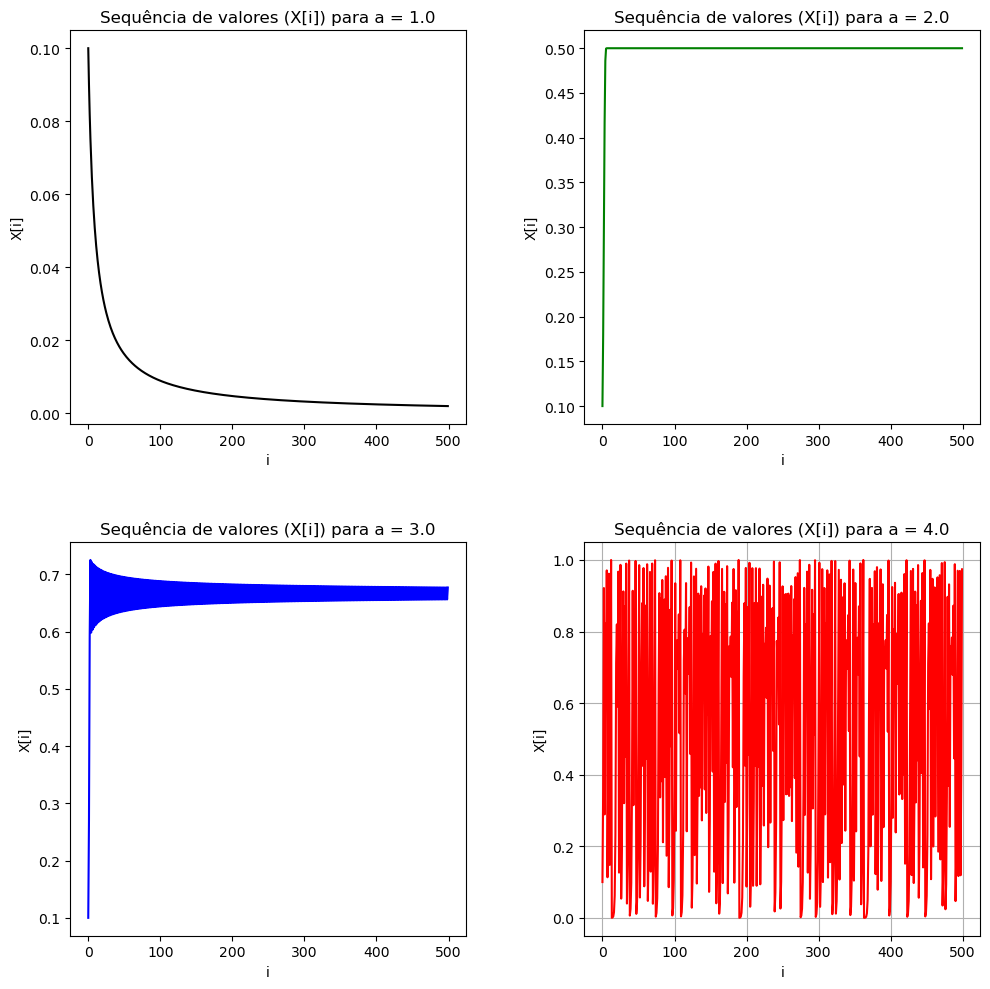

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def seq(a, N):
    x = np.zeros((N,), dtype=np.float64)
    for n in range(N):
        if n == 0:
            x[0] = 0.1
        else:
            x[n] = a*(x[n-1])*(1-x[n-1])
    return x

N = 500
num = np.zeros((4, N), dtype=np.float64)
a = np.array([1.0, 2.0, 3.0, 4.0])
for i in range(4):
    num[i,:] = seq(a[i], N)
lista = [i for i in range(N)]

fig, ax = plt.subplots(2,2, figsize=(10,10))
plt.grid()
ax[0,0].set_title('Sequência de valores (X[i]) para a = 1.0')
ax[0,0].set_xlabel('i')
ax[0,0].set_ylabel('X[i]')
ax[0,0].plot(lista, num[0], '-k')

ax[0,1].set_title('Sequência de valores (X[i]) para a = 2.0')
ax[0,1].set_xlabel('i')
ax[0,1].set_ylabel('X[i]')
ax[0,1].plot(lista, num[1], '-g')

ax[1,0].set_title('Sequência de valores (X[i]) para a = 3.0')
ax[1,0].set_xlabel('i')
ax[1,0].set_ylabel('X[i]')
ax[1,0].plot(lista, num[2], '-b')

ax[1,1].set_title('Sequência de valores (X[i]) para a = 4.0')
ax[1,1].set_xlabel('i')
ax[1,1].set_ylabel('X[i]')
ax[1,1].plot(lista, num[3], '-r')
fig.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

#### Questão 4

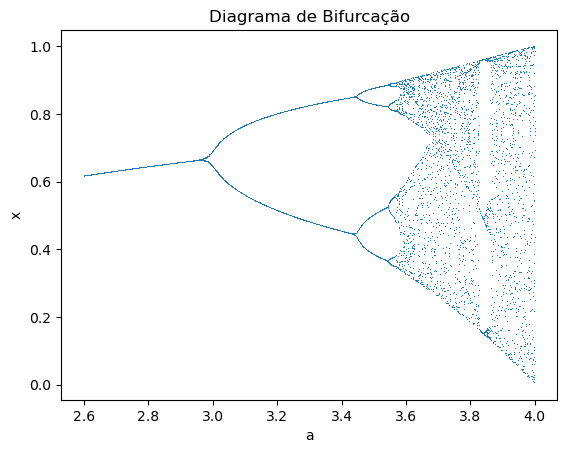

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def seq(a, x):
    return a*x*(1-x)

# listas para os eixos do gráfico
A = []
X = []

qtd = 10
pulos = 100
valores_a = np.linspace(2.6, 4, 1000) #1000 valores igualmente espaçados entre 2.6 e 4

for a in valores_a:
    x = 0.001; 
    for i in range(qtd+pulos):
        # efeito transiente
        if i >= pulos:  
            A.append(a) 
            X.append(x)
         
        x = seq(a,x)

plt.plot(A, X, ls='', marker=',')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Diagrama de Bifurcação')
plt.show()

#### Questão 5

Parte 1

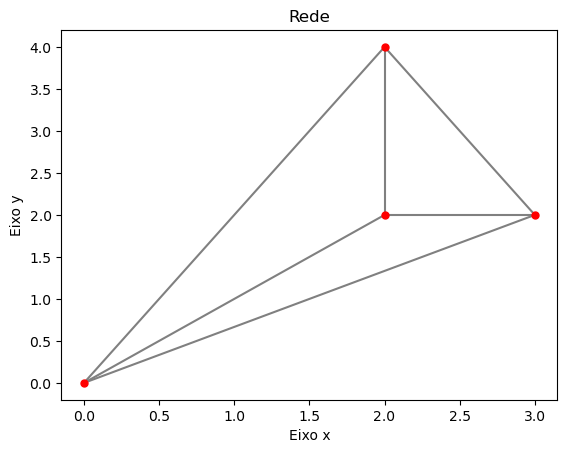

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cria_rede(qtd):
    rede = np.zeros(shape=(qtd,qtd))
    return rede

def cria_conexao(no1, no2):
    rede[no1, no2] = 1
    rede[no2, no1] = 1
    return rede

def cria_coord(qtd):
    coord = np.zeros(shape=(qtd, 2))
    return coord
    
def no_coord(coord, no, x, y):
    coord[no,:] = [x,y]
    
def plot(rede, coord, qtd):
    X = []
    Y = []
    for i in range(qtd):
        X.append(coord[i,0])
        Y.append(coord[i,1])
        for j in range(i+1, qtd):
            if rede[i,j] ==1:
                plt.plot([coord[i,0],coord[j,0]],
                         [coord[i,1], coord[j,1]], 'grey')
    
    plt.plot(X, Y, 'ro', markersize=5)
    plt.title('Rede')
    plt.xlabel('Eixo x')
    plt.ylabel('Eixo y')
    plt.show()

#exemplo:
qtd = 4
rede = cria_rede(qtd)
c = cria_coord(qtd)
no_coord(c, 0, 0, 0)
no_coord(c, 1, 2, 2)
no_coord(c, 2, 2, 4)
no_coord(c, 3, 3, 2)
rede = cria_conexao(0, 1)
rede = cria_conexao(2,3)
rede = cria_conexao(0,2)
rede = cria_conexao(0,3)
rede = cria_conexao(1,2)
rede = cria_conexao(3,1)

plot(rede, c, qtd)

Parte 2

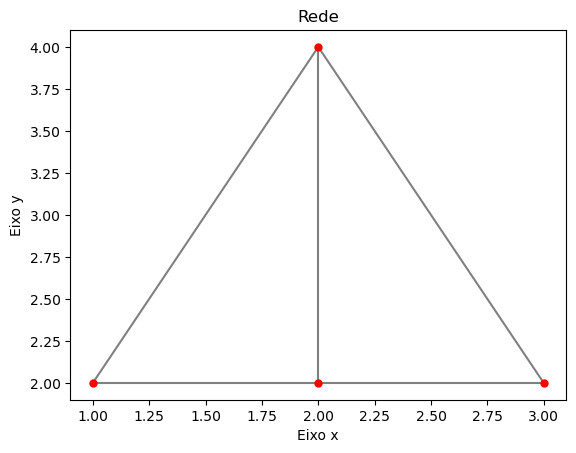

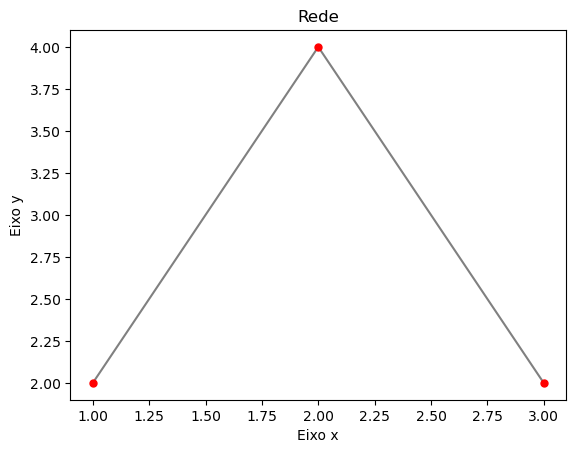

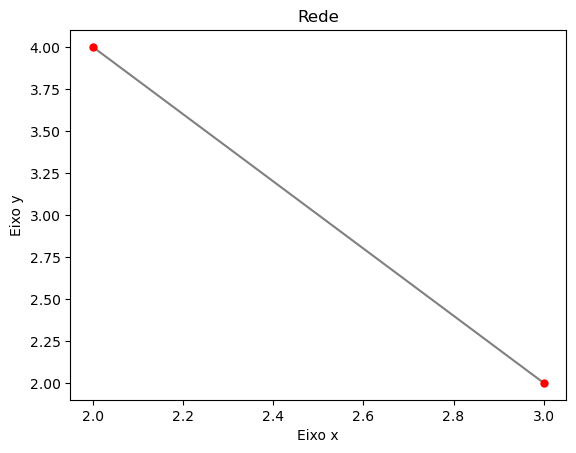

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cria_rede(qtd):
    rede = np.zeros(shape=(qtd,qtd))
    return rede

def ria_conexao(no1, no2):
    rede[no1, no2] = 1
    rede[no2, no1] = 1
    return rede

def cria_coord(qtd):
    coord = np.zeros(shape=(qtd, 2))
    return coord
    
def no_coord(coord, no, x, y):
    coord[no,:] = [x,y]
    
def plot(rede, coord):
    X = []
    Y = []
    qtd = len(rede)
    for i in range(qtd):
        X.append(coord[i,0])
        Y.append(coord[i,1])
        for j in range(i+1, qtd):
            if rede[i,j] ==1:
                plt.plot([coord[i,0],coord[j,0]],
                         [coord[i,1], coord[j,1]], 'grey')
    
    plt.plot(X, Y, 'ro', markersize=5)
    plt.title('Rede')
    plt.xlabel('Eixo x')
    plt.ylabel('Eixo y')
    plt.show()
    
def deleta_no(coord, rede, no):
    rede[no,:] = 0
    for i in range(len(rede)):
        rede[i,no] = 0
    coord[no] = [None, None]

def deleta_aresta(coord, rede, no1, no2):
    rede[no1, no2] = 0
    rede[no2, no1] = 0
    if np.all(rede[no1] == 0):
        deleta_no(coord, rede, no1)
    if np.all(rede[no2] == 0):
        deleta_no(coord, rede, no2)
    return rede
    

#exemplo:
qtd = 4
rede = cria_rede(qtd)
c = cria_coord(qtd)
no_coord(c, 0, 1, 2)
no_coord(c, 1, 2, 2)
no_coord(c, 2, 2, 4)
no_coord(c, 3, 3, 2)
rede = cria_conexao(0, 1)
rede = cria_conexao(2,3)
rede = cria_conexao(0,2)
rede = cria_conexao(1,2)
rede = cria_conexao(3,1)
plot(rede, c)

deleta_no(c, rede, 1)
plot(rede, c)

rede = deleta_aresta(c, rede, 0, 2)
plot(rede, c)
